# Отчет по предмету "Численные методы"
### "Методы решения задач линейной алгебры" 2
**Студент:** Свистельников Илья Вадимович


**ЗАДАНИЕ 2.1**

Реализовать методы простой итерации и Ньютона решения нелинейных уравнений в виде программ, задавая в качестве
входных данных точность вычислений. С использованием разработанного программного обеспечения найти положительный
корень нелинейного уравнения (начальное приближение определить графически). Проанализировать зависимость погрешности
вычислений от количества итераций.


$x^5 - 7x^2 +3 =0$

### Метод простых итераций

In [ ]:
import numpy as np
import math

def simple_iteration(f, phi, x0, eps):
  x = phi(x0)
  iter = 0
  while abs(x - x0) > eps:
    x0 = x
    x = phi(x0)
    iter += 1

  return x, iter

def f(x):
  return x**5 - 7*x*x + 3

def phi(x):
  return ((x**5 + 3)/7)**0.5


In [ ]:
x0S = 1
EPS=[1e-4, 1e-10, 1e-12, 1e-15]
for eps in EPS:
  xS, iter = simple_iteration(f, phi, x0S, eps)
  print(f"Метод простой итерации: {xS}, {iter}")

Метод простой итерации: 0.6691308493405776, 5
Метод простой итерации: 0.6691292244534677, 11
Метод простой итерации: 0.6691292244510575, 13
Метод простой итерации: 0.6691292244510296, 16


### Метод Ньютона

In [ ]:
def newton_method(f, df, x0, eps):
  x = x0 - f(x0) / df(x0)
  iter = 0
  while abs(x - x0) > eps:
    x0 = x
    x = x0 - f(x0) / df(x0)
    iter += 1

  return x, iter

def df(x):
  return 5*x**4 - 14*x

In [ ]:
x0N = 2
EPS=[1e-4, 1e-10, 1e-12, 1e-15]
for eps in EPS:
  xN, iter = newton_method(f, df, x0N, eps)
  print(f"Метод Ньютона: {xN}, {iter}")

Метод Ньютона: 1.82731475546502, 3
Метод Ньютона: 1.8273147552819715, 5
Метод Ньютона: 1.8273147552819715, 5
Метод Ньютона: 1.8273147552819715, 5


### Вывод по заданию 2.1

Были реализованы методы простых итераций и Ньютона и проведен анализ зависимости погрешности от числа итераций.


**ЗАДАНИЕ 2.2**

Реализовать методы простой итерации и Ньютона решения систем нелинейных уравнений в виде программного кода, задавая в
качестве входных данных точность вычислений.
С использованием разработанного программного обеспечения решить систему нелинейных уравнений (при наличии нескольких
решений найти то из них, в котором значения неизвестных являются положительными); начальное приближение определить
графически. Проанализировать зависимость погрешности вычислений от количества итераций.

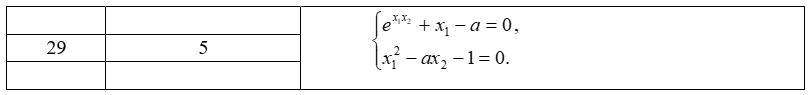

In [ ]:
def F(x):
  f1 = np.exp(x[0]*x[1]) + x[0] - 5
  f2 = x[0]**2 - 5*x[1] - 1
  return np.array([f1, f2])

def PHI(x):
    return np.array([
        (1+5*x[1])**0.5,
        np.log(5-x[0])/x[0]
    ])

def Jacobian(x):
  return np.array([
        [x[1]*np.exp(x[0]*x[1])+1, x[0]*np.exp(x[0]*x[1])],
        [2*x[0], -5]
    ])

### Метод простых итераций

In [ ]:
def simple_iteration_method(f, phi, x0, eps, max_iter=1000):
    x = x0
    iteration = 0
    while iteration <= max_iter:
        x_new = phi(x)
        if np.linalg.norm(x_new - x) < eps:
            return x_new,iteration
        x = x_new
        iteration+=1
    return x, iteration

In [ ]:
x0S = np.array([2, 2])
EPS=[1e-4, 1e-10, 1e-12, 1e-15]

for eps in EPS:
  xS, iter = simple_iteration_method(F, PHI, x0S, eps)
  print(f"Метод простой итерации: {xS}, {iter}")

Метод простой итерации: [1.95923647 0.56765847], 36
Метод простой итерации: [1.9591575  0.56765962], 88
Метод простой итерации: [1.9591575  0.56765962], 105
Метод простой итерации: [1.9591575  0.56765962], 130


### Метод Ньютона

In [ ]:
def newton_method(f, J, x0, eps, max_iter=1000):
    x = x0
    for iteration in range(max_iter):
        dx = np.linalg.solve(J(x), -f(x))
        x = x + dx
        if np.linalg.norm(dx) < eps:
            return x, iteration
    return x, max_iter

In [ ]:
x0N = np.array([3, 3])
EPS=[1e-4, 1e-10, 1e-12, 1e-15]

for eps in EPS:
  xN, iter = newton_method(F, Jacobian, x0S, eps)
  print(f"Метод Ньютона: {xN}, {iter}")

Метод Ньютона: [1.9591575  0.56765962], 6
Метод Ньютона: [1.9591575  0.56765962], 7
Метод Ньютона: [1.9591575  0.56765962], 7
Метод Ньютона: [1.9591575  0.56765962], 8


### Вывод по заданию 2.2

Были реализованы методы простых итераций и Ньютона и проведен анализ зависимости погрешности от числа итераций.


